<h1><center>CNN model</center></h1>

#### Importing Packges

In [1]:
import librosa 
from scipy.io import wavfile as wav
import numpy as np
import os
from tensorflow.keras.callbacks import ModelCheckpoint 
from datetime import datetime 
import pandas as pd
import pickle

## Import the 'Audio_Feature.pkl' file 

In [2]:
featuresdf=pd.read_pickle('audio_features.pkl')

In [3]:
featuresdf.head()

,feature,class_label
0,"[[-442.67386, -251.59383, -185.341, -146.59306...",Hip-Hop
1,"[[-440.8941, -278.4838, -201.6568, -185.19707,...",Hip-Hop
2,"[[-167.92076, -65.83541, -34.50405, -42.122894...",Pop
3,"[[-594.1487, -546.7575, -509.81274, -393.41272...",Folk
4,"[[-519.364, -415.97653, -344.3424, -330.5782, ...",Folk


### Creation of model

In [4]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_rows = 40
num_columns = 1292
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1]
filter_size = 2

### Model Training

## Model 1

In [12]:
# Construct model 
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
"""
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
"""
model1.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))
model1.add(GlobalAveragePooling2D())

model1.add(Dense(num_labels, activation='softmax'))

### Model Compile

In [13]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [14]:
num_epochs = 100
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights1.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history1=model1.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
320/320 [==============================] - ETA: 0s - loss: 1.9109 - accuracy: 0.2779
Epoch 00001: val_loss improved from inf to 1.93192, saving model to weights1.best.basic_cnn.hdf5
320/320 [==============================] - 10s 32ms/step - loss: 1.9109 - accuracy: 0.2779 - val_loss: 1.9319 - val_accuracy: 0.2075
Epoch 2/100
319/320 [============================>.] - ETA: 0s - loss: 1.7671 - accuracy: 0.3393
Epoch 00002: val_loss improved from 1.93192 to 1.73555, saving model to weights1.best.basic_cnn.hdf5
320/320 [==============================] - 9s 29ms/step - loss: 1.7674 - accuracy: 0.3391 - val_loss: 1.7355 - val_accuracy: 0.3575
Epoch 3/100
319/320 [============================>.] - ETA: 0s - loss: 1.7105 - accuracy: 0.3633
Epoch 00003: val_loss did not improve from 1.73555
320/320 [==============================] - 9s 29ms/step - loss: 1.7107 - accuracy: 0.3630 - val_loss: 1.7360 - val_accuracy: 0.3562
Epoch 4/100
319/320 [============================>.] - ETA: 0s 

319/320 [============================>.] - ETA: 0s - loss: 1.3772 - accuracy: 0.5132
Epoch 00056: val_loss improved from 1.44209 to 1.43209, saving model to weights1.best.basic_cnn.hdf5
320/320 [==============================] - 9s 29ms/step - loss: 1.3766 - accuracy: 0.5135 - val_loss: 1.4321 - val_accuracy: 0.5000
Epoch 57/100
319/320 [============================>.] - ETA: 0s - loss: 1.3793 - accuracy: 0.5122
Epoch 00057: val_loss did not improve from 1.43209
320/320 [==============================] - 10s 31ms/step - loss: 1.3798 - accuracy: 0.5123 - val_loss: 1.4636 - val_accuracy: 0.4975
Epoch 58/100
319/320 [============================>.] - ETA: 0s - loss: 1.3697 - accuracy: 0.5190
Epoch 00058: val_loss did not improve from 1.43209
320/320 [==============================] - 10s 31ms/step - loss: 1.3701 - accuracy: 0.5190 - val_loss: 1.4710 - val_accuracy: 0.4856
Epoch 59/100
319/320 [============================>.] - ETA: 0s - loss: 1.3727 - accuracy: 0.5188
Epoch 00059: val_los

319/320 [============================>.] - ETA: 0s - loss: 1.3306 - accuracy: 0.5281
Epoch 00084: val_loss did not improve from 1.41151
320/320 [==============================] - 9s 29ms/step - loss: 1.3300 - accuracy: 0.5284 - val_loss: 1.5142 - val_accuracy: 0.4569
Epoch 85/100
319/320 [============================>.] - ETA: 0s - loss: 1.3331 - accuracy: 0.5350
Epoch 00085: val_loss did not improve from 1.41151
320/320 [==============================] - 9s 30ms/step - loss: 1.3334 - accuracy: 0.5349 - val_loss: 1.4790 - val_accuracy: 0.4875
Epoch 86/100
319/320 [============================>.] - ETA: 0s - loss: 1.3252 - accuracy: 0.5365 ETA: 0s - loss: 1.3275 - accuracy
Epoch 00086: val_loss did not improve from 1.41151
320/320 [==============================] - 10s 30ms/step - loss: 1.3245 - accuracy: 0.5368 - val_loss: 1.4462 - val_accuracy: 0.4925
Epoch 87/100
319/320 [============================>.] - ETA: 0s - loss: 1.3206 - accuracy: 0.5359
Epoch 00087: val_loss did not improve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


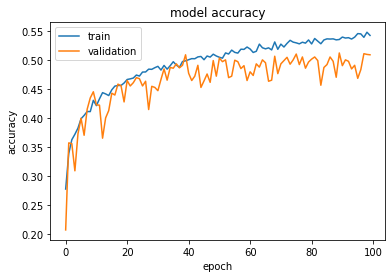

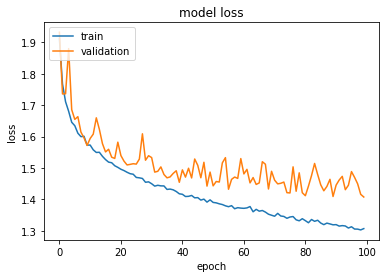

In [15]:
import matplotlib.pyplot as plt

print(history1.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model 2

In [6]:
# Construct model 
model2 = Sequential()
model2.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model2.add(MaxPooling2D(pool_size=2))
model2.add(Dropout(0.2))
model2.add(GlobalAveragePooling2D())

model2.add(Dense(num_labels, activation='softmax'))

### Model Compile

In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 1291, 16)      80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 645, 16)       0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 645, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 644, 16)       1040      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 322, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 322, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 321, 16)        1

In [7]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [8]:
num_epochs = 100
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights2.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history2=model2.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
320/320 [==============================] - ETA: 0s - loss: 2.2485 - accuracy: 0.2342
Epoch 00001: val_loss improved from inf to 1.92843, saving model to weights2.best.basic_cnn.hdf5
320/320 [==============================] - 11s 33ms/step - loss: 2.2485 - accuracy: 0.2342 - val_loss: 1.9284 - val_accuracy: 0.2600
Epoch 2/100
319/320 [============================>.] - ETA: 0s - loss: 1.7794 - accuracy: 0.3328
Epoch 00002: val_loss improved from 1.92843 to 1.85852, saving model to weights2.best.basic_cnn.hdf5
320/320 [==============================] - 9s 29ms/step - loss: 1.7792 - accuracy: 0.3330 - val_loss: 1.8585 - val_accuracy: 0.2950
Epoch 3/100
319/320 [============================>.] - ETA: 0s - loss: 1.6951 - accuracy: 0.3741
Epoch 00003: val_loss improved from 1.85852 to 1.80910, saving model to weights2.best.basic_cnn.hdf5
320/320 [==============================] - 10s 30ms/step - loss: 1.6946 - accuracy: 0.3741 - val_loss: 1.8091 - val_accuracy: 0.2994
Epoch 4/100


Epoch 28/100
319/320 [============================>.] - ETA: 0s - loss: 1.3482 - accuracy: 0.5318
Epoch 00028: val_loss did not improve from 1.44780
320/320 [==============================] - 9s 29ms/step - loss: 1.3484 - accuracy: 0.5317 - val_loss: 1.4588 - val_accuracy: 0.4787
Epoch 29/100
319/320 [============================>.] - ETA: 0s - loss: 1.3513 - accuracy: 0.5180 ETA: 0s - loss:
Epoch 00029: val_loss did not improve from 1.44780
320/320 [==============================] - 9s 29ms/step - loss: 1.3511 - accuracy: 0.5181 - val_loss: 1.4599 - val_accuracy: 0.4919
Epoch 30/100
319/320 [============================>.] - ETA: 0s - loss: 1.3330 - accuracy: 0.5263
Epoch 00030: val_loss did not improve from 1.44780
320/320 [==============================] - 9s 29ms/step - loss: 1.3321 - accuracy: 0.5267 - val_loss: 1.4988 - val_accuracy: 0.4725
Epoch 31/100
319/320 [============================>.] - ETA: 0s - loss: 1.3411 - accuracy: 0.5281
Epoch 00031: val_loss improved from 1.44780

Epoch 56/100
319/320 [============================>.] - ETA: 0s - loss: 1.2434 - accuracy: 0.5588
Epoch 00056: val_loss did not improve from 1.36259
320/320 [==============================] - 10s 30ms/step - loss: 1.2440 - accuracy: 0.5582 - val_loss: 1.3873 - val_accuracy: 0.5213
Epoch 57/100
319/320 [============================>.] - ETA: 0s - loss: 1.2461 - accuracy: 0.5644
Epoch 00057: val_loss did not improve from 1.36259
320/320 [==============================] - 9s 30ms/step - loss: 1.2457 - accuracy: 0.5643 - val_loss: 1.3984 - val_accuracy: 0.5113
Epoch 58/100
319/320 [============================>.] - ETA: 0s - loss: 1.2378 - accuracy: 0.5633
Epoch 00058: val_loss improved from 1.36259 to 1.35149, saving model to weights2.best.basic_cnn.hdf5
320/320 [==============================] - 9s 29ms/step - loss: 1.2375 - accuracy: 0.5635 - val_loss: 1.3515 - val_accuracy: 0.5425
Epoch 59/100
319/320 [============================>.] - ETA: 0s - loss: 1.2428 - accuracy: 0.5602
Epoch 00

Epoch 85/100
319/320 [============================>.] - ETA: 0s - loss: 1.1860 - accuracy: 0.5879
Epoch 00085: val_loss improved from 1.33795 to 1.33620, saving model to weights2.best.basic_cnn.hdf5
320/320 [==============================] - 9s 30ms/step - loss: 1.1857 - accuracy: 0.5882 - val_loss: 1.3362 - val_accuracy: 0.5444
Epoch 86/100
319/320 [============================>.] - ETA: 0s - loss: 1.1892 - accuracy: 0.5741
Epoch 00086: val_loss did not improve from 1.33620
320/320 [==============================] - 9s 30ms/step - loss: 1.1897 - accuracy: 0.5737 - val_loss: 1.3479 - val_accuracy: 0.5387
Epoch 87/100
319/320 [============================>.] - ETA: 0s - loss: 1.1798 - accuracy: 0.5809
Epoch 00087: val_loss did not improve from 1.33620
320/320 [==============================] - 9s 30ms/step - loss: 1.1802 - accuracy: 0.5809 - val_loss: 1.3952 - val_accuracy: 0.5294
Epoch 88/100
319/320 [============================>.] - ETA: 0s - loss: 1.1847 - accuracy: 0.5801
Epoch 000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


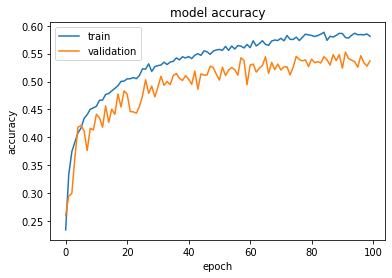

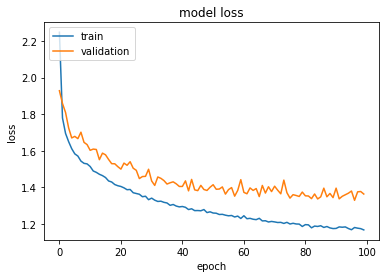

In [9]:
import matplotlib.pyplot as plt

print(history2.history.keys())
#  "Accuracy"
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

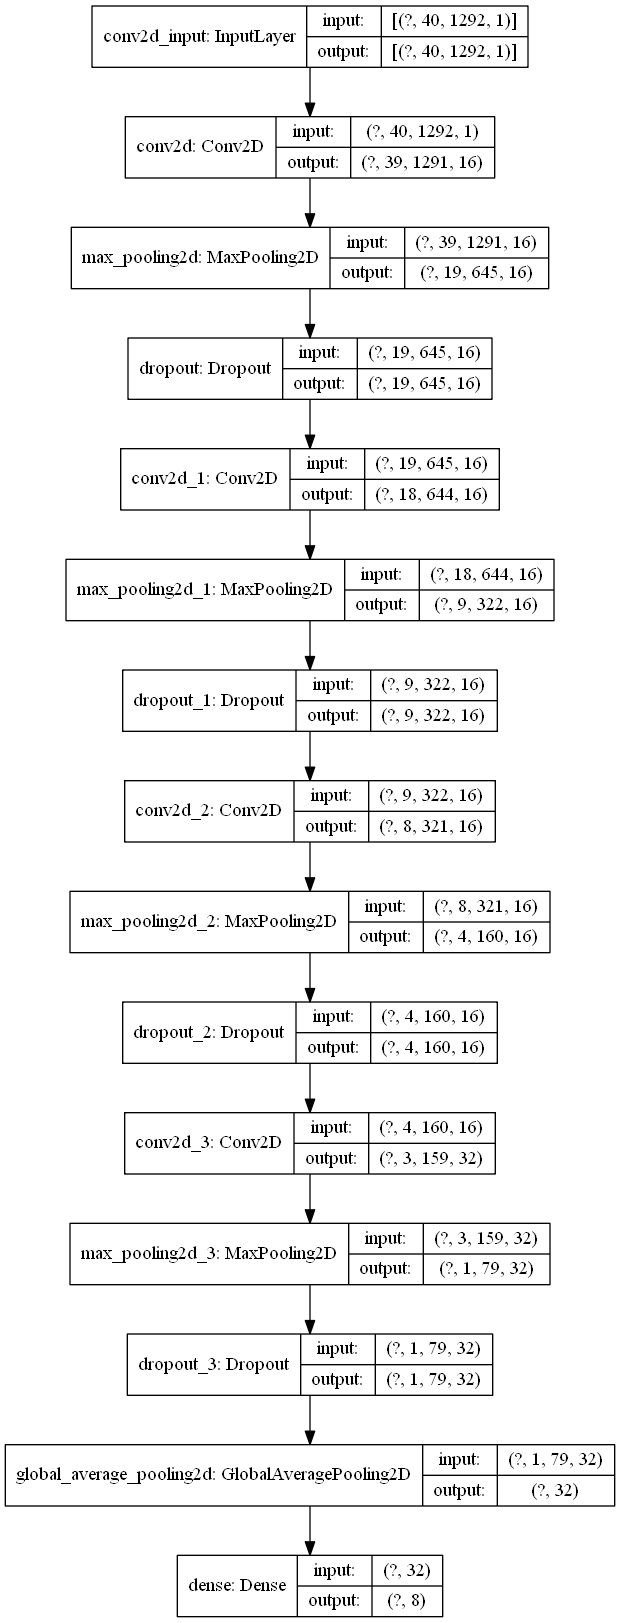

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

### Saving the values of the history to a CSV

In [39]:
historydf=pd.DataFrame.from_dict(history2.history)
historydf.to_csv('best_model_history.csv')

## Model 3

In [21]:
# Construct model 
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(GlobalAveragePooling2D())

model3.add(Dense(num_labels, activation='softmax'))

### Model Compile

In [22]:
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
num_epochs = 100
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights3.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history3=model3.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
319/320 [============================>.] - ETA: 0s - loss: 1.2500 - accuracy: 0.56 - ETA: 0s - loss: 1.2487 - accuracy: 0.5627
Epoch 00001: val_loss improved from inf to 1.38213, saving model to weights3.best.basic_cnn.hdf5
320/320 [==============================] - 16s 49ms/step - loss: 1.2484 - accuracy: 0.5626 - val_loss: 1.3821 - val_accuracy: 0.5181
Epoch 2/100
319/320 [============================>.] - ETA: 0s - loss: 1.2265 - accuracy: 0.5680
Epoch 00002: val_loss improved from 1.38213 to 1.35858, saving model to weights3.best.basic_cnn.hdf5
320/320 [==============================] - 16s 49ms/step - loss: 1.2260 - accuracy: 0.5679 - val_loss: 1.3586 - val_accuracy: 0.5144
Epoch 3/100
319/320 [============================>.] - ETA: 0s - loss: 1.2126 - accuracy: 0.5809
Epoch 00003: val_loss improved from 1.35858 to 1.33369, saving model to weights3.best.basic_cnn.hdf5
320/320 [==============================] - 16s 49ms/step - loss: 1.2124 - accuracy: 0.5807 - val_loss:

Epoch 57/100
319/320 [============================>.] - ETA: 0s - loss: 0.7500 - accuracy: 0.7320
Epoch 00057: val_loss did not improve from 1.27975
320/320 [==============================] - 15s 48ms/step - loss: 0.7514 - accuracy: 0.7313 - val_loss: 1.5688 - val_accuracy: 0.5356
Epoch 58/100
319/320 [============================>.] - ETA: 0s - loss: 0.7473 - accuracy: 0.7342
Epoch 00058: val_loss did not improve from 1.27975
320/320 [==============================] - 16s 48ms/step - loss: 0.7480 - accuracy: 0.7338 - val_loss: 1.5403 - val_accuracy: 0.5275
Epoch 59/100
319/320 [============================>.] - ETA: 0s - loss: 0.7501 - accuracy: 0.7356
Epoch 00059: val_loss did not improve from 1.27975
320/320 [==============================] - 15s 48ms/step - loss: 0.7500 - accuracy: 0.7355 - val_loss: 1.5137 - val_accuracy: 0.5419
Epoch 60/100
319/320 [============================>.] - ETA: 0s - loss: 0.7506 - accuracy: 0.7306 ETA: 1s - loss:
Epoch 00060: val_loss did not improve fr

Epoch 86/100
319/320 [============================>.] - ETA: 0s - loss: 0.6719 - accuracy: 0.7580
Epoch 00086: val_loss did not improve from 1.27975
320/320 [==============================] - 16s 49ms/step - loss: 0.6720 - accuracy: 0.7582 - val_loss: 1.7082 - val_accuracy: 0.5244
Epoch 87/100
319/320 [============================>.] - ETA: 0s - loss: 0.6730 - accuracy: 0.7603
Epoch 00087: val_loss did not improve from 1.27975
320/320 [==============================] - 15s 48ms/step - loss: 0.6735 - accuracy: 0.7602 - val_loss: 1.7139 - val_accuracy: 0.5337
Epoch 88/100
319/320 [============================>.] - ETA: 0s - loss: 0.6596 - accuracy: 0.7654
Epoch 00088: val_loss did not improve from 1.27975
320/320 [==============================] - 16s 49ms/step - loss: 0.6600 - accuracy: 0.7654 - val_loss: 1.7829 - val_accuracy: 0.5231
Epoch 89/100
319/320 [============================>.] - ETA: 0s - loss: 0.6767 - accuracy: 0.7639
Epoch 00089: val_loss did not improve from 1.27975
320/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


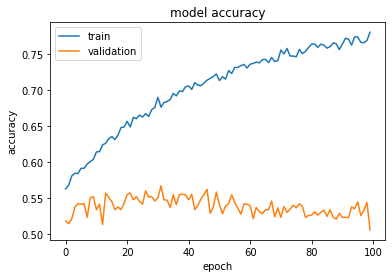

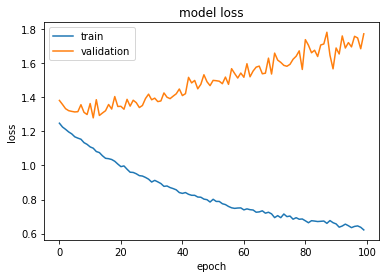

In [26]:
import matplotlib.pyplot as plt

print(history3.history.keys())
#  "Accuracy"
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Model 4

In [25]:
# Construct model 
model4 = Sequential()
model4.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))

model4.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))
model4.add(GlobalAveragePooling2D())

model4.add(Dense(num_labels, activation='softmax'))

In [26]:
x_train.shape[0]

6397

### Model Compile

In [27]:
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
# Display model architecture summary 
model4.summary()

# Calculate pre-training accuracy 
score = model4.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 39, 1291, 16)      80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 19, 645, 16)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 19, 645, 16)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 644, 32)       2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 322, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 9, 322, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 321, 64)       

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 100
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='weights4.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history4=model4.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
320/320 [==============================] - ETA: 0s - loss: 1.9418 - accuracy: 0.3172
Epoch 00001: val_loss improved from inf to 1.75115, saving model to weights4.best.basic_cnn.hdf5
320/320 [==============================] - 13s 39ms/step - loss: 1.9418 - accuracy: 0.3172 - val_loss: 1.7512 - val_accuracy: 0.3750
Epoch 2/100
319/320 [============================>.] - ETA: 0s - loss: 1.6206 - accuracy: 0.4022
Epoch 00002: val_loss improved from 1.75115 to 1.65668, saving model to weights4.best.basic_cnn.hdf5
320/320 [==============================] - 12s 36ms/step - loss: 1.6203 - accuracy: 0.4025 - val_loss: 1.6567 - val_accuracy: 0.4106
Epoch 3/100
319/320 [============================>.] - ETA: 0s - loss: 1.5522 - accuracy: 0.4418
Epoch 00003: val_loss did not improve from 1.65668
320/320 [==============================] - 12s 36ms/step - loss: 1.5529 - accuracy: 0.4418 - val_loss: 1.6696 - val_accuracy: 0.3569
Epoch 4/100
319/320 [============================>.] - ETA: 0

Epoch 56/100
319/320 [============================>.] - ETA: 0s - loss: 0.7460 - accuracy: 0.7337 ETA: 1s - l
Epoch 00056: val_loss did not improve from 1.27569
320/320 [==============================] - 12s 36ms/step - loss: 0.7455 - accuracy: 0.7341 - val_loss: 1.4906 - val_accuracy: 0.5512
Epoch 57/100
319/320 [============================>.] - ETA: 0s - loss: 0.7377 - accuracy: 0.7348
Epoch 00057: val_loss did not improve from 1.27569
320/320 [==============================] - 12s 36ms/step - loss: 0.7372 - accuracy: 0.7350 - val_loss: 1.4973 - val_accuracy: 0.5575
Epoch 58/100
319/320 [============================>.] - ETA: 0s - loss: 0.7351 - accuracy: 0.7389
Epoch 00058: val_loss did not improve from 1.27569
320/320 [==============================] - 12s 36ms/step - loss: 0.7360 - accuracy: 0.7385 - val_loss: 1.4878 - val_accuracy: 0.5525
Epoch 59/100
319/320 [============================>.] - ETA: 0s - loss: 0.7208 - accuracy: 0.7472
Epoch 00059: val_loss did not improve from 1

Epoch 85/100
319/320 [============================>.] - ETA: 0s - loss: 0.5932 - accuracy: 0.7832
Epoch 00085: val_loss did not improve from 1.27569
320/320 [==============================] - 12s 36ms/step - loss: 0.5937 - accuracy: 0.7830 - val_loss: 1.8949 - val_accuracy: 0.4938
Epoch 86/100
319/320 [============================>.] - ETA: 0s - loss: 0.5677 - accuracy: 0.7939
Epoch 00086: val_loss did not improve from 1.27569
320/320 [==============================] - 12s 36ms/step - loss: 0.5669 - accuracy: 0.7943 - val_loss: 1.6915 - val_accuracy: 0.5456
Epoch 87/100
319/320 [============================>.] - ETA: 0s - loss: 0.5580 - accuracy: 0.7956
Epoch 00087: val_loss did not improve from 1.27569
320/320 [==============================] - 12s 36ms/step - loss: 0.5580 - accuracy: 0.7954 - val_loss: 1.7838 - val_accuracy: 0.5406
Epoch 88/100
319/320 [============================>.] - ETA: 0s - loss: 0.5777 - accuracy: 0.7929
Epoch 00088: val_loss did not improve from 1.27569
320/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


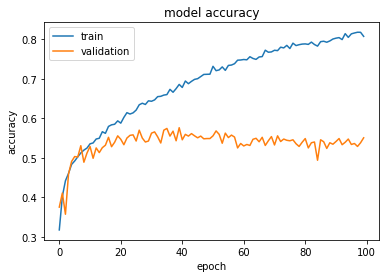

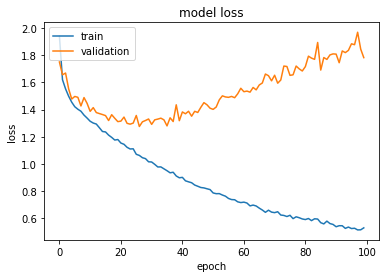

In [31]:
import matplotlib.pyplot as plt

print(history4.history.keys())
#  "Accuracy"
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### CNN model is run using the spectogram feature and we are able to get accuracy of approx 54% validation accuracy and 58% training accuracy. The model fits perfectly to the training data, which is better than the tranfer learning model which is run on the spectogram images.